# Applied Data Science with Python

Department of Computer Science
University of Reading

Number of hours spent on the course work: 20 hours

Module Title: Applied Data Science with Python
Module Code: CSMAD21
Lecturer responsible: Dr. Carmen Lam / Dr Todd Jones
Assignment Report Title: Coursework
Student Number: 30854806
Date (when work was completed): Jan 8, 2023
Actual hours spent on assignment: 50
Assignment evaluation (3 key points):
- It was fun exploring different kind of plots. While I have not used different kinds of few plots however during the coursework I explored a lot it was facinating to see what python can produce
- I would like to learn more about machine learning. We were taught about model fitting and prediction but it would be great if we can experiment with the latest machine learning techniques and spend more time on it

# Task 1

In [1]:
# Importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

bds = pd.read_csv('/Users/anas/Documents/Python/metro.csv')
print(bds)
bds.info()
bds

# Get the number of rows and columns in the DataFrame
num_rows, num_cols = bds.shape

# Print the number of rows and columns
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')


         trip_id  duration       start_time         end_time  start_station  \
0      124657107         5    7/1/2019 0:04    7/1/2019 0:09           4312   
1      124657587         9    7/1/2019 0:07    7/1/2019 0:16           3066   
2      124658068         5    7/1/2019 0:20    7/1/2019 0:25           4410   
3      124659747        20    7/1/2019 0:44    7/1/2019 1:04           3045   
4      124660227        27    7/1/2019 0:44    7/1/2019 1:11           3035   
...          ...       ...              ...              ...            ...   
92119  130053092         8  9/30/2019 23:32  9/30/2019 23:40           3038   
92120  130053090        15  9/30/2019 23:38  9/30/2019 23:53           4401   
92121  130053089         1  9/30/2019 23:40  9/30/2019 23:41           3038   
92122  130053088        22  9/30/2019 23:41   10/1/2019 0:03           3067   
92123  130053087         4  9/30/2019 23:58   10/1/2019 0:02           4417   

       start_lat   start_lon  end_station    end_la

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Data Review

We have extracted the file metro.csv into a dataframe bds (appreciation for bike data set).

Using the shape attribute we have determined that the number of columns are 15 and number of rows are 92124

With info attribute we have determined that the data is composed of integers, float and object datatype. Further we notice that non-null entries in start_lan, start_lon, end_lad and end_lon are less then than the total number of rows i.e. 92124.

There is also a warning that shows that column 10 which is the bike_id column consists of mixed datatype. During the data cleasning stage we will determine what these types are how these will be treated.

In [2]:
#Identifying mixed datatypes in the bike_id column
#The warning shows there are mixed data types. Using the code below to check for mixed data data types

mixed_types = bds.loc[~bds['bike_id'].astype(str).str.isdigit(), 'bike_id'].tolist()
mixed_types

['Rblock', 'Rblock']

The above code has identified two rows that have 'Rblock' data type. These don't have any values and have to be removed. 

We check for duplicate values in the data frame

In [3]:
# Check for duplicate rows
duplicate_mask = bds.duplicated()

# Printing number of duplicate rows
print(f'Number of duplicate rows: {duplicate_mask.sum()}')

# Print the rows that are duplicates
print(bds[duplicate_mask])


Number of duplicate rows: 0
Empty DataFrame
Columns: [trip_id, duration, start_time, end_time, start_station, start_lat, start_lon, end_station, end_lat, end_lon, bike_id, plan_duration, trip_route_category, passholder_type, bike_type]
Index: []


Number of duplicate rows is 0 therefore there is nothing to remove here.

In the next step, we start the data cleansing exercise. We already know what there are two rows in bike_id column that have Rblock datatype that needs to be removed. The next piece of code will identify the number of missing values and print it.

# Data cleansing

In [4]:
#Data cleansing
#Finding missing values in the dataframe
missing_values = bds.isnull().sum()
print(missing_values)

trip_id                   0
duration                  0
start_time                0
end_time                  0
start_station             0
start_lat              2139
start_lon              2139
end_station               0
end_lat                4072
end_lon                4072
bike_id                   0
plan_duration             0
trip_route_category       0
passholder_type           0
bike_type                 0
dtype: int64


In [5]:
# Dropping rows that contain missing values and save into a new dataframe 'bds_clean'
bds = bds.dropna(axis=0)
bds_clean = bds.copy()
missing_values = bds_clean.isnull().sum()
print(missing_values)

bds_clean.info()
print("Number of rows after dropping:", len(bds))

trip_id                0
duration               0
start_time             0
end_time               0
start_station          0
start_lat              0
start_lon              0
end_station            0
end_lat                0
end_lon                0
bike_id                0
plan_duration          0
trip_route_category    0
passholder_type        0
bike_type              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 86760 entries, 0 to 92122
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              86760 non-null  int64  
 1   duration             86760 non-null  int64  
 2   start_time           86760 non-null  object 
 3   end_time             86760 non-null  object 
 4   start_station        86760 non-null  int64  
 5   start_lat            86760 non-null  float64
 6   start_lon            86760 non-null  float64
 7   end_station          86760 non-null  int64  
 8 

We observed in the beginning that start/end longitude and lattitude columns had missing values. New data frame does not have missing values. These are also reflected in the code above. As we have dropped all missing values, thence the total rows  have reduced from 92124 to 86760.

In the next step we check if the Rblock values still exist.

In [6]:
#Checking if Rblock entry still exists in the dataframe
mixed_types = bds_clean.loc[~bds_clean['bike_id'].astype(str).str.isdigit(), 'bike_id'].tolist()
mixed_types
#The output shows that there are no Rblock entries there these rows were already dropped in the last step

[]

In [7]:
bds_clean['duration'].describe()

count    86760.000000
mean        26.996404
std         95.720579
min          1.000000
25%          6.000000
50%         11.000000
75%         21.000000
max       1440.000000
Name: duration, dtype: float64

The average duration for a trip is 27 minutes long. Minumum trip is 1 minute long and maximum trip is of 1440 minutes which is 24 hours long! Looking at the minimum and maximum values it seems there are outliers in the date and these will be removed

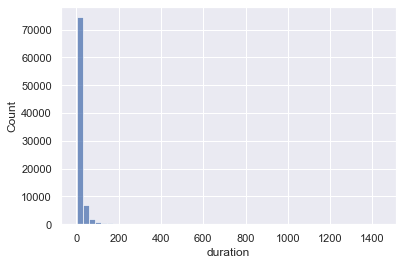

In [8]:
# Plotting to see trip duration and their counts

# Importing seaborn

import seaborn as sns

# Set seaborn style
sns.set(style="darkgrid")

# Plot a histogram of the 'duration' column
sns.histplot(data=bds_clean, x='duration', bins = 50)

# Show the plot
plt.show()

From the plot it appears that most trips are less than 200 minutes long. Therefore we will drop all trips with duration greater than 200 minutes long

In [9]:
# Removing outliers

#Help from: https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

#Determining oulier entries whose duration is over 200 minutes
long_rides = bds_clean[bds_clean['duration'] > 200]

# Printing number of rows to be removed

print('Number of rows to be removed', len(long_rides))

morethan_200 = bds_clean['duration'] > 200

# Drop the rows 
bds_clean.drop(bds_clean[morethan_200].index, inplace=True)

print('Number of rows after dropping:', len(bds_clean))


Number of rows to be removed 1256
Number of rows after dropping: 85504


In [10]:
# Help from: https://www.freecodecamp.org/news/drop-list-of-rows-from-pandas-dataframe/

# Removing improper rides i.e rides that don't leave the station i.e. start station id is same as end station
# id and duration is less than 5 minutes

improper_rides_len = bds_clean[(bds_clean['start_station'] == bds_clean['end_station']) & (bds_clean['duration'] < 5)]
print("Improper rides:", len(improper_rides_len))

improper_rides = ((bds_clean['start_station'] == bds_clean['end_station']) & (bds_clean['duration'] < 5))

bds_clean.drop(bds_clean[improper_rides].index , inplace=True)
print("Number of rows after dropping improper rides:", len(bds_clean))

Improper rides: 2907
Number of rows after dropping improper rides: 82597


In [11]:
# Identifying the number of unique values
print(bds.nunique())

trip_id                86760
duration                 789
start_time             55377
end_time               53768
start_station            180
start_lat                180
start_lon                179
end_station              180
end_lat                  180
end_lon                  179
bike_id                 3518
plan_duration              4
trip_route_category        2
passholder_type            6
bike_type                  3
dtype: int64


In [12]:
#Displaying unique values for the 4 columns. This will help in further classification
columns = ['plan_duration', 'trip_route_category', 'passholder_type', 'bike_type']

# Print values in each column seperately
for column in columns:
  print(f"Column: {column}")
  print(f"Unique values: {bds[column].unique()}")
  print()


Column: plan_duration
Unique values: [ 30   1 365 999]

Column: trip_route_category
Unique values: ['One Way' 'Round Trip']

Column: passholder_type
Unique values: ['Monthly Pass' 'Walk-up' 'Annual Pass' 'One Day Pass' 'Flex Pass'
 'Testing']

Column: bike_type
Unique values: ['standard' 'electric' 'smart']



By observing the parameters it can inferred that 'duration' is the only variable which can be used to identify outliers since this measured attribute can have potential errors. However the rest of the attributes are not measured and rather hard-coded or they already have determined unique values which are not outliers

# Data pre-processing

Here we convert the objects datatype into integers. 

In [13]:
# Converting the 'bike_id' column to integer data type
bds_clean['bike_id'] = bds_clean['bike_id'].astype(int)

# Printing information for the dataframe
bds_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 82597 entries, 0 to 92122
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   trip_id              82597 non-null  int64  
 1   duration             82597 non-null  int64  
 2   start_time           82597 non-null  object 
 3   end_time             82597 non-null  object 
 4   start_station        82597 non-null  int64  
 5   start_lat            82597 non-null  float64
 6   start_lon            82597 non-null  float64
 7   end_station          82597 non-null  int64  
 8   end_lat              82597 non-null  float64
 9   end_lon              82597 non-null  float64
 10  bike_id              82597 non-null  int64  
 11  plan_duration        82597 non-null  int64  
 12  trip_route_category  82597 non-null  object 
 13  passholder_type      82597 non-null  object 
 14  bike_type            82597 non-null  object 
dtypes: float64(4), int64(6), object(5)
m

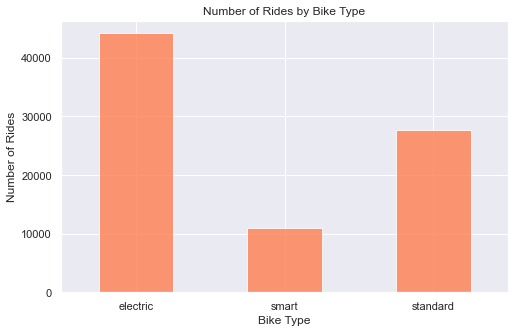

In [14]:
# Grouping the data by 'bike_type' and count the number of rides
# Counting the number of rides by bike type
rides_by_bike_type = bds_clean.groupby('bike_type').size().reset_index(name='count')

rides_by_bike_type.plot(kind='bar', x='bike_type', y='count',
        title='Number of Rides by Bike Type',
        color='coral', alpha=0.8,
        rot=0, figsize=(8, 5), legend=False)

plt.xlabel('Bike Type')
plt.ylabel('Number of Rides')
plt.show()

From the plot above it can determeind that electric bike was the first choice for ride, followed by standard and smart bike. There can be many reasons why an electric bike is first choice for riders. It is possible that riders do not want exert a lot of effort in their travels. Smart bike is the last choice for riders. Is is unclear why standard bike is chosen over smart bike.

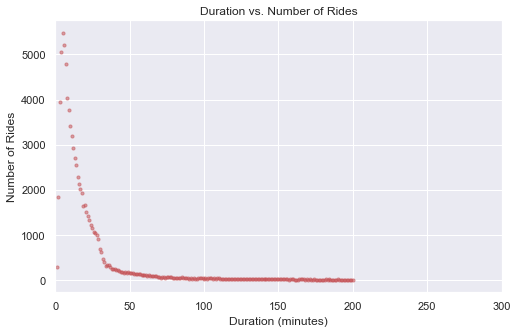

In [15]:
# Plotting duration against the number of rides

# Finding total number of trips
number_of_trips = bds_clean.groupby('duration').size().reset_index(name='count')

# Plotting number of trips with trip duration
number_of_trips.plot(kind='scatter', x='duration', y='count', title='Duration vs. Number of Rides',
               xlabel='Duration (minutes)', ylabel='Number of Rides',
               c='r', s=10, alpha=0.5, figsize=(8,5), xlim=(0, 300))

# Show the plot
plt.show()

From the plot it can be seen that most number of trips were less then 50 minutes long and very few trips had longer duration. 

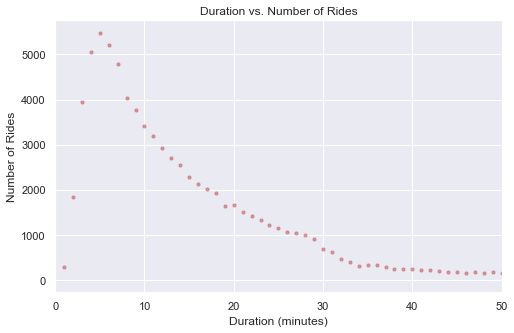

In [16]:
# Showing another plot with maximum duration of 50 minutes
number_of_trips.plot(kind='scatter', x='duration', y='count', title='Duration vs. Number of Rides',
               xlabel='Duration (minutes)', ylabel='Number of Rides',
               c='r', s=10, alpha=0.5, figsize=(8,5), xlim=(0, 50))

plt.show()

Looking at the plot more closely we observe that most of the trips are up to 35 minutes in duration. We also see some rides that are that are very short. It is possible that people want to try out a bike ride for fun or experience hence duration is very short.

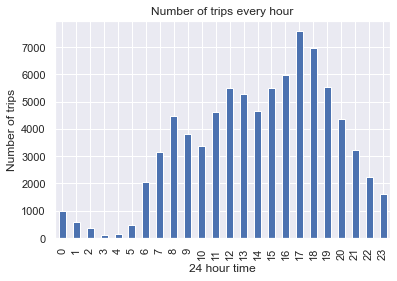

In [17]:
# Plotting number of trips taken during hour of day

# Convert start_time to a date time object. 
bds_clean['start_time'] = pd.to_datetime(bds_clean['start_time'])

# Extract hour from datetime object
bds_clean['start_hour'] = bds_clean['start_time'].dt.hour

# Count the number of hours
hour_counts = bds_clean['start_hour'].value_counts()

# Sort hours so that they start from 0 and end and 24
hour_counts = hour_counts.sort_index()

# Plot hour vs number of trips
hour_counts.plot(kind='bar', xlabel = '24 hour time', ylabel = 'Number of trips', title = 'Number of trips every hour')
plt.show()

The above plot shows that bike ride were made mostly during the day i.e. early morning till late light (6 am to 11 pm. Maximum rides were taken at 1700 hours. Minimum number of trips were taken between 12 am to 5 am.

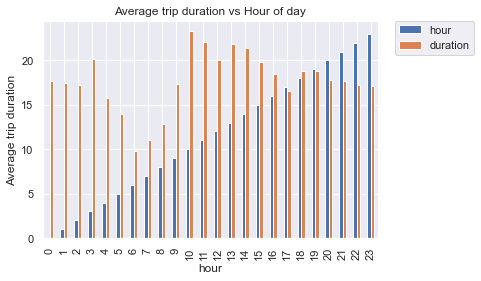

In [18]:
# Plotting average duration against hour of day
bds_clean['hour'] = bds_clean['start_time'].dt.hour

average_duration_hour = bds_clean.groupby('hour')['duration'].mean().reset_index()

# Plot trips per day against number of trips
average_duration_hour.plot(kind = 'bar', xlabel = 'hour', ylabel = 'Average trip duration')
plt.title('Average trip duration vs Hour of day')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()

From the plot we can see that the average duration of trip was highest at 10 am of more then 25 minutes long and it tapers till 6pm. It rises again at 7 pm and drops at a lower rate.

From the two plots i.e. number of trips at every hour and average duration against hour of day - we observe that at 4 am there is a spike in trip duration however it has least number of trips.

The reason is not clear, however, it could be assumed that at this time there are cycling enthusiasts who want to go on a long ride or may be there are people who have to go on early morning shifts.

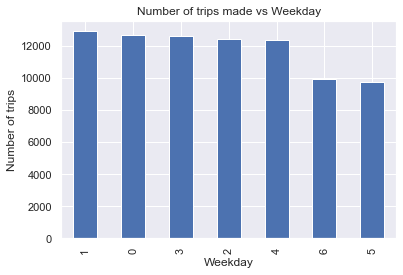

In [19]:
# Converting to datetime object
bds_clean['start_time'] =  pd.to_datetime(bds_clean['start_time'], format='%d%b%Y:%H:%M:%S.%f')
bds_clean['day_of_week'] = bds_clean['start_time'].dt.day_of_week

# Count the number of trips for each day
trips_per_day = bds_clean['day_of_week'].value_counts()

# Plot trips per day against number of trips
trips_per_day.plot(kind = 'bar', xlabel = 'Weekday', ylabel = 'Number of trips')
plt.title('Number of trips made vs Weekday')

# Show the plot
plt.show()

By plotting day against the number of trips we can observe that least number of trips were taken during the weekend (Saturday and Sunday).

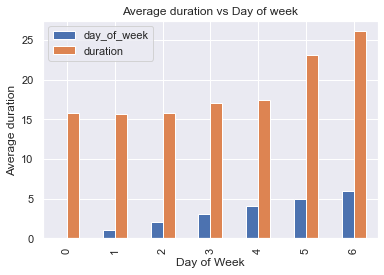

In [20]:
# Plotting average duration against day of week

bds_clean['day_of_week'] = bds_clean['start_time'].dt.day_of_week

average_duration_dayofweek = bds_clean.groupby('day_of_week')['duration'].mean().reset_index()

# Plotting trips per day against number of trips
average_duration_dayofweek.plot(kind = 'bar', xlabel = 'Day of Week', ylabel = 'Average duration')
plt.title('Average duration vs Day of week')

# Show the plot
plt.show()

From the plot we can see that the average duration of trip was higher during the weekends and lower in weekdays. One reason for this could be that people go for bike leisure trips over weekends

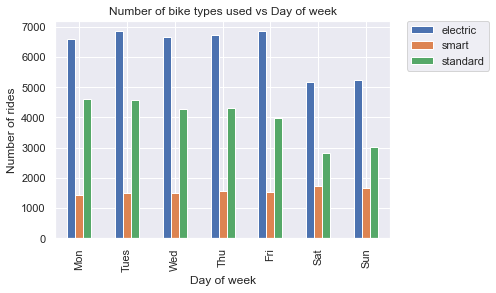

In [21]:
# Plotting the number of bike types used on each day of the week

bds_clean['day_of_week'] = bds_clean['start_time'].dt.day_of_week

bike_type_dayofweek = bds_clean.groupby(['day_of_week','bike_type'])['duration'].size().reset_index()

#Pivoting the data to create a dataframe with one column for each bike type
bike_type_dayofweek = bike_type_dayofweek.pivot(index='day_of_week', columns='bike_type', values='duration')

ax = bike_type_dayofweek.plot(kind='bar', xlabel='Day of week', ylabel='Number of rides')

# Seting the x-axis tick labels to the abbreviated names of the days of the week
ax.set_xticklabels(['Mon', 'Tues', 'Wed', 'Thu','Fri', 'Sat','Sun'])

plt.title('Number of bike types used vs Day of week')

# Adjusting position of the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show the plot
plt.show()


From the plot we can observe how bike types are used each day of the week. The most popular bike type is electric, followed by standard and smart bike types. The number of rides taken during the weekend reduces however electric bike is still the most popular choice of the riders.

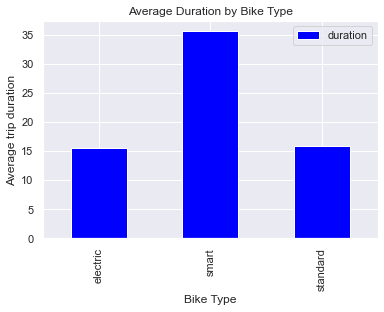

In [22]:
#Making a bar chart of bike type vs average duration of ride

average_duration_by_bike_type = bds_clean.groupby('bike_type')['duration'].mean().reset_index()

# Create a bar chart of bike type against number of trips
average_duration_by_bike_type.plot(x='bike_type', y='duration', kind='bar', 
                                   xlabel = 'Bike Type', ylabel = 'Average trip duration',
                                   color='blue', title='Average Duration by Bike Type')


# Show the plot
plt.show()

By plotting bike types against average duration it can be observed that smart bike has the hightest trip duration. The dataset does not provide reasons for choice of bike therefore more research work is required here to gather relevant information.

In [23]:
#Making a table chart of number of trips vs start station

trips_start_station = bds_clean.groupby('start_station').size().reset_index(name = 'count')

# Print station id with number of trips initiated
trips_start_station.head()

,start_station,count
0,3005,4274
1,3006,2190
2,3007,1456
3,3008,1047
4,3010,196


From the table above it can be observed that maximum trips started from Station 3005 which was 4457 so it is the most popular station.

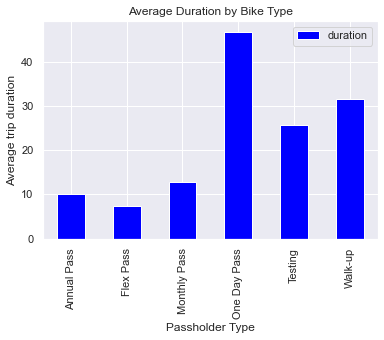

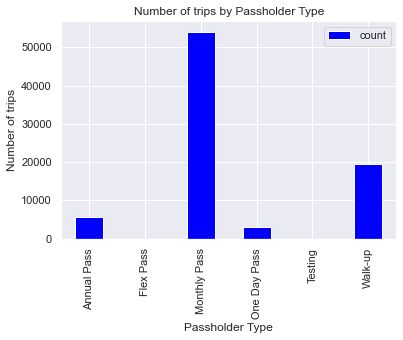

In [24]:
#Making a bar chart of Passholder type vs average duration of ride

average_duration_by_passholder_type = bds_clean.groupby('passholder_type')['duration'].mean().reset_index()

# Create a bar chart of average duration with bike type
average_duration_by_passholder_type.plot(x='passholder_type', y='duration', kind='bar', 
                                   xlabel = 'Passholder Type', ylabel = 'Average trip duration',
                                   color='blue', title='Average Duration by Bike Type')


#Making a bar chart of Passholder type vs Number of rides
trips_by_passholder_type = bds_clean.groupby('passholder_type').size().reset_index(name = 'count')

trips_by_passholder_type.plot(x='passholder_type', y='count', kind='bar', 
                                   xlabel = 'Passholder Type', ylabel = 'Number of trips',
                                   color='blue', title='Number of trips by Passholder Type')


# Show the plot
plt.show()


Bar chart is plotted for Passholder Type against average trip duration. It can be observed that One Day Pass has the maximum average duration and Flex Pass has the least average duration. Further the plot of Passholder type vs number of trips shows that Monthly pass has the maximum number of trips.

# Task 2 

In [25]:
#importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seeds = pd.read_csv('/Users/anas/Documents/Python/seeds.csv')
print(seeds)
seeds.info()
seeds

      area  perimeter  compactness  length  width  asymmetry  groove_length
0    15.26      14.84        0.871   5.763  3.312      2.221          5.220
1    14.88      14.57        0.881   5.554  3.333      1.018          4.956
2    14.29      14.09        0.905   5.291  3.337      2.699          4.825
3    13.84      13.94        0.895   5.324  3.379      2.259          4.805
4    16.14      14.99        0.903   5.658  3.562      1.355          5.175
..     ...        ...          ...     ...    ...        ...            ...
205  12.19      13.20        0.878   5.137  2.981      3.631          4.870
206  11.23      12.88        0.851   5.140  2.795      4.325          5.003
207  13.20      13.66        0.888   5.236  3.232      8.315          5.056
208  11.84      13.21        0.852   5.175  2.836      3.598          5.044
209  12.30      13.34        0.868   5.243  2.974      5.637          5.063

[210 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0

,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.878,5.137,2.981,3.631,4.870
206,11.23,12.88,0.851,5.140,2.795,4.325,5.003
207,13.20,13.66,0.888,5.236,3.232,8.315,5.056
208,11.84,13.21,0.852,5.175,2.836,3.598,5.044


File seeds.csv is imported in a dataframe 'seeds'. The information extracted shows that the data has 7 variables (columns) and it has record of 280 seeds and all attributes are of float data type. The data provides dimensional characteristics of different seeds.

From the information above can see that there are no null values in the dataframe. Therefore there are no missing values that the data needs to be adjusted for.

Next the pairplot function is used to visualise the data using scatter plots. This shows the overall structure of the data

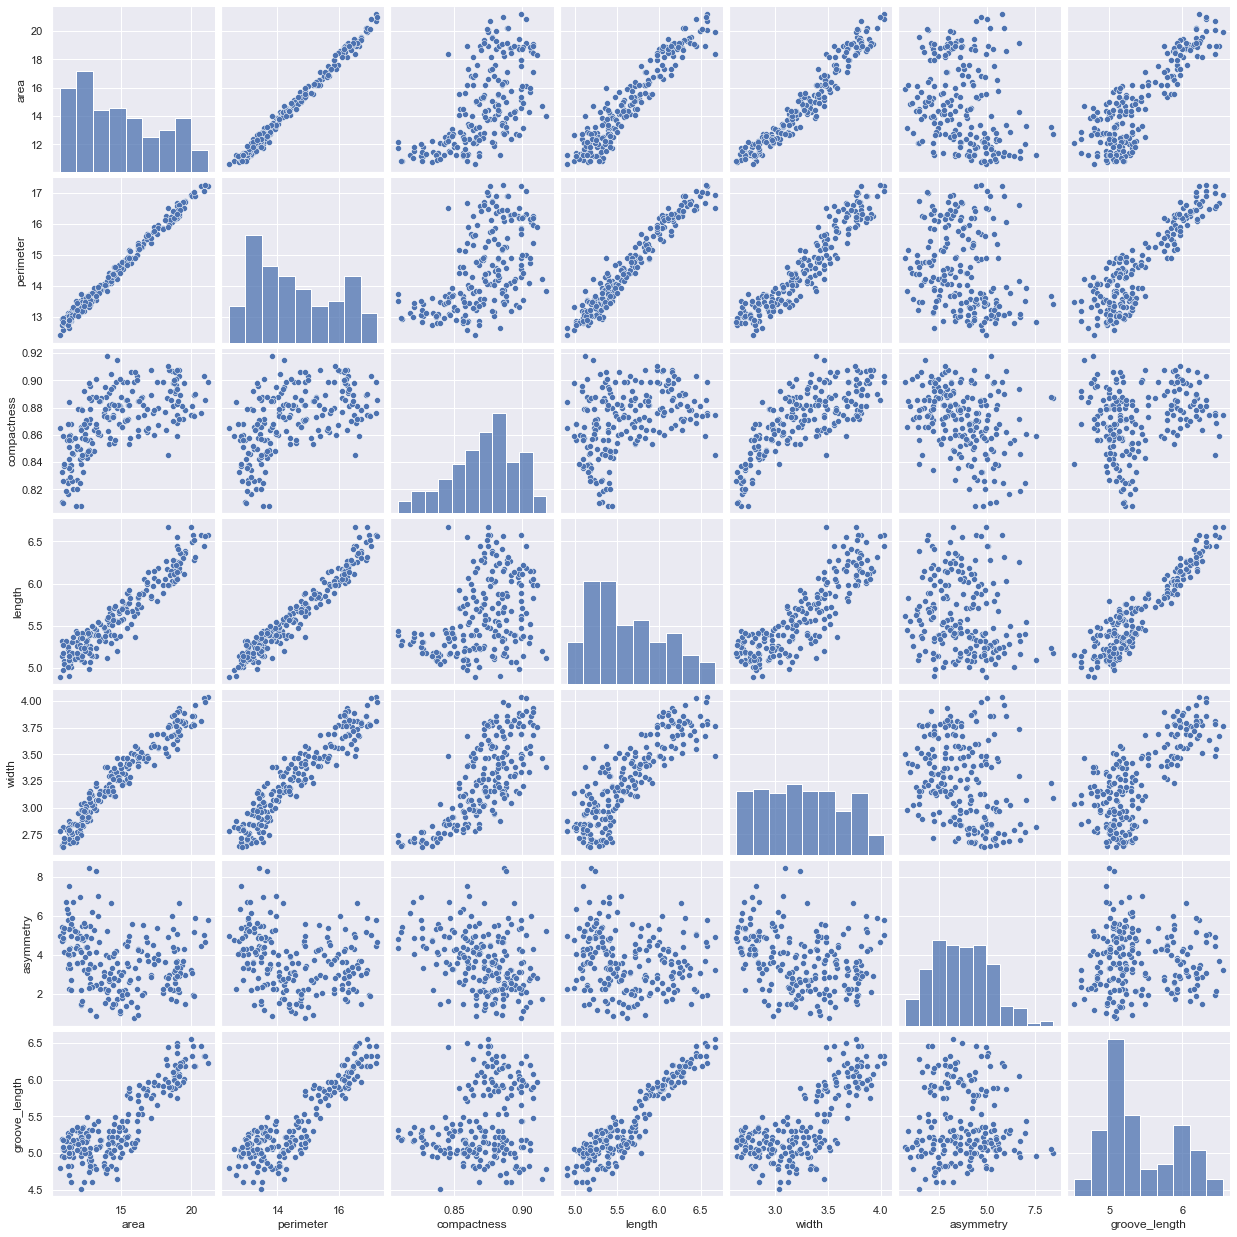

In [26]:
sns.pairplot(seeds)

From the plots above we can observe that groove_length forms loose clusters with other attributes. Besides groove_length there is no attribute that defines any clusters.

In [27]:
#Disabling all warnings

import warnings
warnings.filterwarnings('ignore')

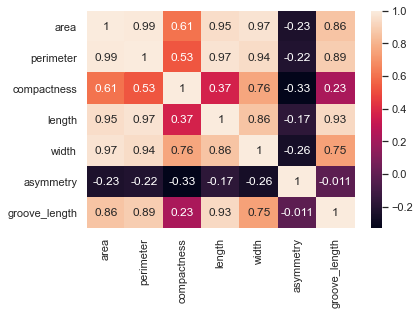

In [28]:
#Identifying correlations between any variables. Using a heatmap
sns.heatmap(seeds.corr(), annot=True)

# Show the plot
plt.show()

We can see from the plot above that there is strong correllation between area, perimeter, length and width. This is understable since dimensions of the seed and area or perimeter are mathematically related.

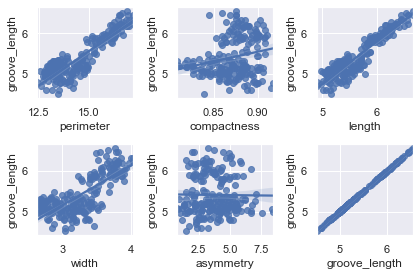

In [29]:
# Inspecting relationships: regression plots

# Create the subplots
fig, ax = plt.subplots(2,3)

ax = ax.flatten()

# Making subplots of groove length with other parameters
for cnc, c in enumerate(seeds.columns[1:]):
    sns.regplot(x=c, y='groove_length', data=seeds, ax=ax[cnc])
plt.tight_layout()

There is some degree correlation between groove_length and perimeter/length/width

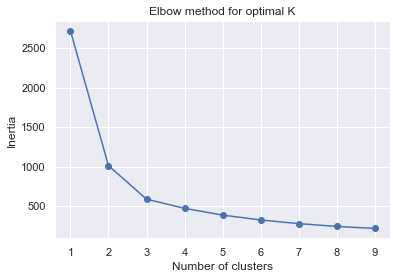

In [30]:
# Plotting clusters

# Calculating optimum number of clusters using inertia for the elbow method.

# Importing tools
from sklearn.cluster import KMeans

kmeans_inertias = []

#Iterate i over the range
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(seeds)
    kmeans_inertias.append(km.inertia_)

# Plotting the inertia scores for the different number of clusters
plt.plot(range(1, 10), kmeans_inertias, marker='o')
plt.title('Elbow method for optimal K')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()


From the plot above we can identify the inertia value at 3. This is point were the points within each cluster are more closely grouped around the center of the cluster.

In the next step we execute dimensionality reduction with Principal Component Analysis. The objective is to reduce the number of dimensions in the data and to remove noise and redundancy. By reducing the number of dimensions, it can be easier to visualize and understand the data, and it can also make the analysis more computationally efficient.

This will also help identify the underlying structure of the data and how the different variables are related to each other.

In [31]:
# Importing relevant libraries

from sklearn.decomposition import PCA

# Extract the features and labels from the dataframe
X = seeds.iloc[:, :-1]
y = seeds.iloc[:, -1]

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

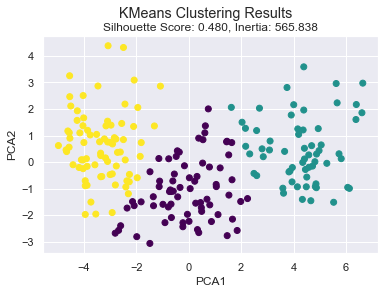

In [32]:
# Performing KMeans clustering with PCA results
# Using 3 clusters as determined with elbow method

# Importing relevant libary
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_transformed)
cluster_labels_kmeans = kmeans.predict(X_transformed)

# Compute the silhouette score
score = silhouette_score(X_transformed, cluster_labels_kmeans)

# Create a scatter plot of the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=cluster_labels_kmeans, cmap='viridis')
plt.title('KMeans clustering')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.suptitle('KMeans Clustering Results')
plt.title('Silhouette Score: {:.3f}, Inertia: {:.3f}'.format(score, kmeans.inertia_))

# Show the plot
plt.show()

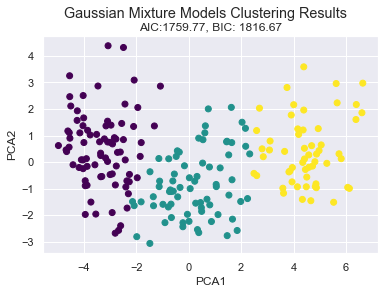

In [33]:
# Using the GMM clustering with PCA results

# Importing relevant libraries
from sklearn import mixture
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components = 3)

# Fit the GMM model to the data
gmm.fit(X_transformed)

# Predict the cluster labels
cluster_labels_gmm = gmm.predict(X_transformed)

# Create a scatter plot of the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=cluster_labels_gmm, cmap='viridis')

# Add labels and title and show the plot
plt.suptitle('Gaussian Mixture Models Clustering Results')
plt.title('AIC:{:.2f}, BIC: {:.2f}'.format(gmm.aic(X_transformed), gmm.bic(X_transformed)))
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()


In [34]:
# Evaluating which clustering method is better using adjusted Rand index

from sklearn.metrics import rand_score, adjusted_rand_score

# Compute the adjusted Rand index for the KMeans clusters
kmeans_ari = adjusted_rand_score(y, cluster_labels_gmm)
kmeans_ri = rand_score(y, cluster_labels_gmm)

# Compute the adjusted Rand index for the GMM clusters
gmm_ari = adjusted_rand_score(y, cluster_labels_gmm)
gmm_ri = rand_score(y, cluster_labels_gmm)

# Print the results
print('KMeans ARI: {:.9f}'.format(kmeans_ari))
print('GMM ARI: {:.9f}'.format(gmm_ari))
print('KMeans ARI: {:.9f}'.format(kmeans_ri))
print('GMM ARI: {:.9f}'.format(gmm_ri))


KMeans ARI: 0.003654476
GMM ARI: 0.003654476
KMeans ARI: 0.662246525
GMM ARI: 0.662246525


From the calculated scores of Rand index and Adjusted Rand index we observe that there is no difference between the values for KMeans and Gaussian Mixture Model. Therefore the clusterings obtained by both methods are similar. While
K-means may be preferred over GMM in cases where computational efficiency is a concern, because it is generally faster to run than GMM. On the other hand, GMM may be preferred in cases where the data is not well-separated or has a more complex cluster structure, because it can capture more complex patterns in the data.

# Task 3

In [35]:
# Importing tools
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

social_network = pd.read_csv('/Users/anas/Documents/Python/social-network.csv')
print(social_network)
social_network.info()
social_network

         1     2
0        1     3
1        1     4
2        1     5
3        1     6
4        1     7
...    ...   ...
2975  2699  2884
2976  2699  2885
2977  2699  2886
2978  2699  2887
2979  2699  2888

[2980 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       2980 non-null   int64
 1   2       2980 non-null   int64
dtypes: int64(2)
memory usage: 46.7 KB


,1,2
0,1,3
1,1,4
2,1,5
3,1,6
4,1,7
...,...,...
2975,2699,2884
2976,2699,2885
2977,2699,2886
2978,2699,2887


Observing the dataset above we can see that nodes are save in (a,b) format i.e node 1 is connected to node 3,5,5,6,7 or more. There are 2980 nodes in total.

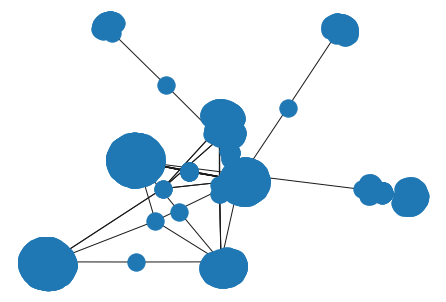

In [36]:
# Help sought: https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html
# Load the data into a NetworkX Graph
Graph = nx.read_edgelist('/Users/anas/Documents/Python/social-network.csv', delimiter=',', 
                         create_using=nx.Graph())

# Visualize the network topology
nx.draw(Graph)


Using the draw function from NetworkX library shows the basic topography of the network. We don't see many nodes connecting with each other. 

In the next step, we will use the figure function to expand network visualisation so we can have a better look at the layout. 

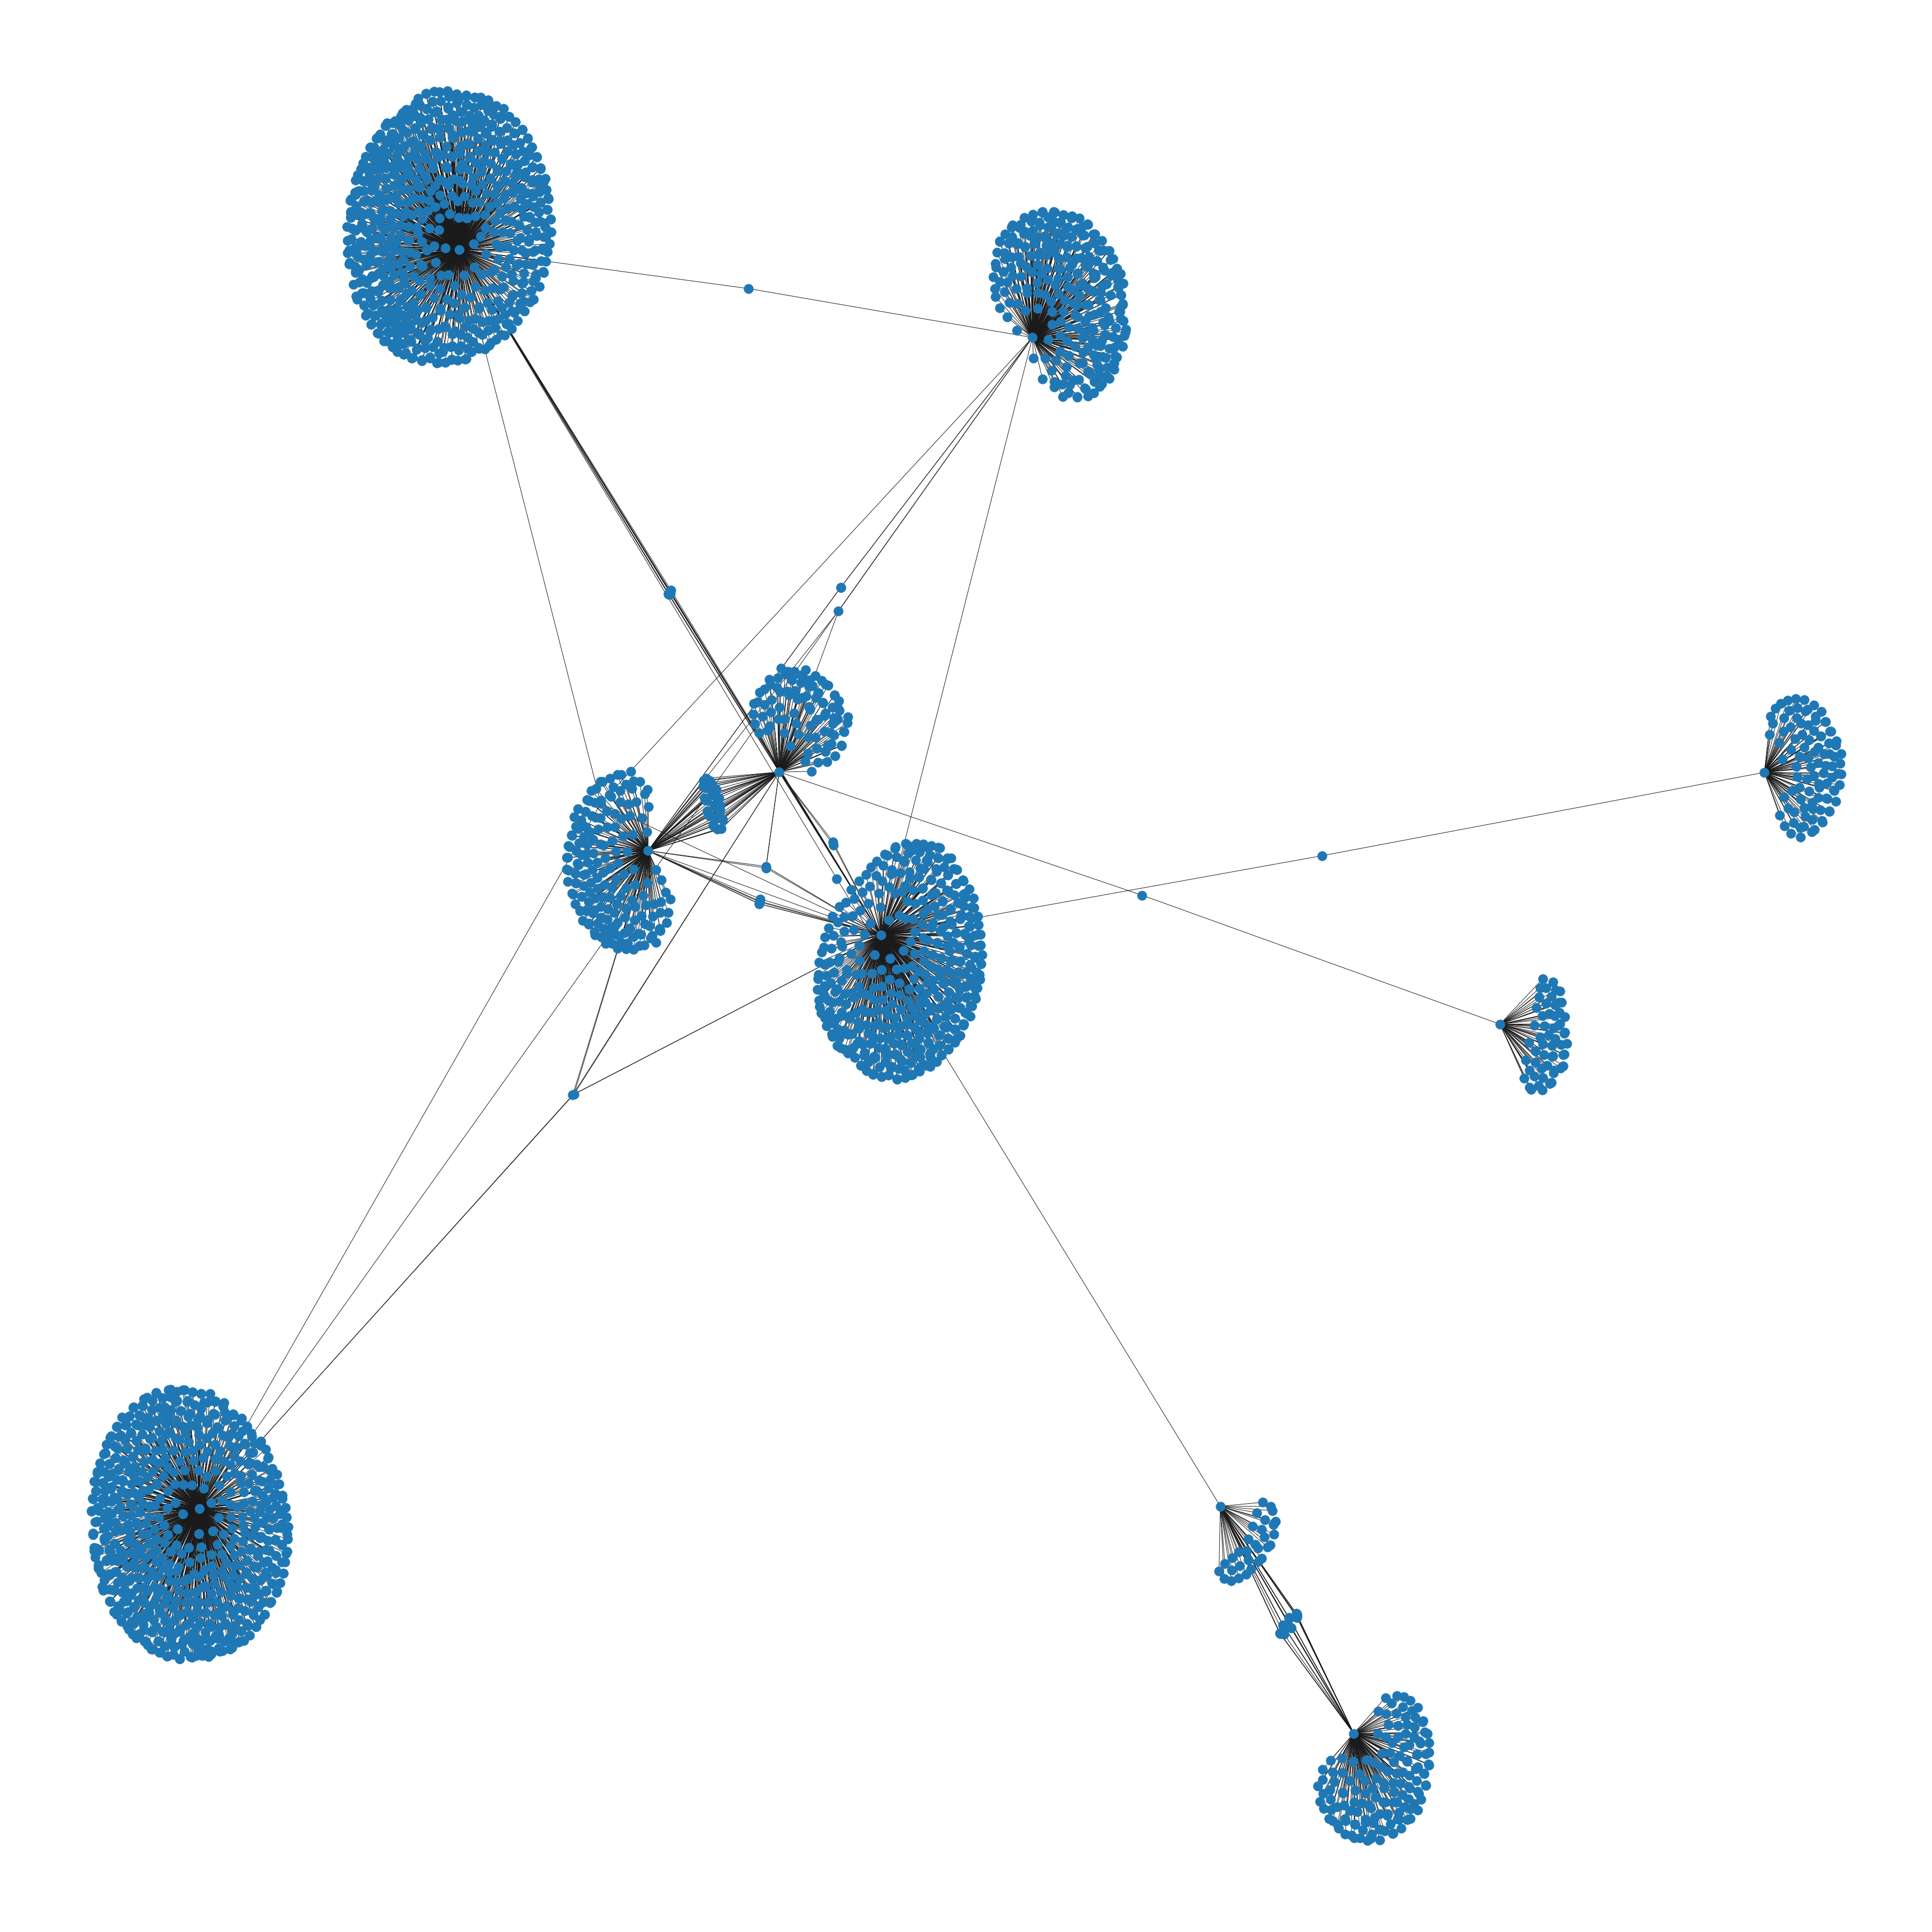

In [37]:
pos = nx.spring_layout(Graph)

# Visualize the network topology
plt.figure(figsize=(50, 50))
nx.draw(Graph, pos = pos)

We can see how the nodes are spread out. We can see that only a few nodes have many edges otherwise the network topology is spread out with little connections in between the nodes. 

In [38]:
# Calculating number of nodes and edges 
print('The social network data has ', Graph.number_of_nodes(),' nodes')

The social network data has  2888  nodes


In [39]:
print('The social network data has ', Graph.number_of_edges(),' edges')

The social network data has  2981  edges


The number of nodes and edges shows that at an average one node has a little over 1 edge only. This means most of the nodes will have only one connection.

In [40]:
print(f'The density of this network is {nx.density(Graph):.5f}')

The density of this network is 0.00072


The density statistic represents the proportion of possible relationships in the network that are actually present. This number is between 0 to 1. Higher number means the nodes have high relationships between each other and vice versa. 

The density value of this network is 0.0007 which is very low. This shows that nodes in network in consideration has very little relationship with other nodes.

In [41]:
# Checking if they are any connected components
nx.number_connected_components(Graph)

1

This is a single entity network. Therefore we can traverse any node in the network from any other node.

In [42]:
# Checking the network diameter value
nx.diameter(Graph)

9

The diameter of this network is 9. This means to travel the shortest distance between the two most distant nodes we will have to traverse at 9 nodes.

In [43]:
# Print the degree of each node if it is greater than 1
count = 0
for node in Graph.nodes():
  if Graph.degree(node) > 1:
    print("Node ", node, " has degree ", Graph.degree(node))
    count+=1
    
print("There are ", count, " nodes with degree greater than 1.")

# Printing the node with maximum degree
max_degree = 0
max_node = None
for node in Graph.nodes():
  if Graph.degree(node) > max_degree:
    max_degree = Graph.degree(node)
    max_node = node

print("Node ", max_node, " has the maximum degree of ", max_degree)


Node  1  has degree  287
Node  35  has degree  2
Node  69  has degree  2
Node  71  has degree  3
Node  90  has degree  2
Node  217  has degree  2
Node  247  has degree  4
Node  288  has degree  481
Node  1525  has degree  710
Node  603  has degree  769
Node  710  has degree  221
Node  714  has degree  139
Node  335  has degree  2
Node  469  has degree  2
Node  493  has degree  2
Node  510  has degree  2
Node  526  has degree  2
Node  584  has degree  2
Node  594  has degree  2
Node  624  has degree  2
Node  639  has degree  2
Node  711  has degree  3
Node  712  has degree  2
Node  713  has degree  2
Node  715  has degree  2
Node  716  has degree  4
Node  717  has degree  2
Node  718  has degree  2
Node  719  has degree  4
Node  720  has degree  3
Node  721  has degree  2
Node  722  has degree  2
Node  764  has degree  2
Node  2232  has degree  97
Node  1524  has degree  2
Node  2348  has degree  2
Node  2351  has degree  2
Node  2352  has degree  2
Node  2354  has degree  2
Node  2356 

Using the code above we can see that that there are 98 nodes that have more than one degree to it and node with has maximum degree is Node number 603 with degree of 769. These numbers validate the assessment above that most of the nodes have only one edge.

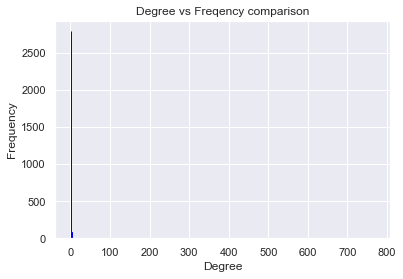

In [44]:
# Use the degree_histogram function to get the degree frequencies
degree_sequence = [d for n, d in Graph.degree()]
degree_count = nx.degree_histogram(Graph)

# Plot a histogram

plt.hist(degree_sequence, bins=range(max(degree_sequence)+1), edgecolor='blue')
plt.title('Degree vs Freqency comparison')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()


We can see from the plot above that the degree distribution is skewed at the top that is, most of the nodes have less than 2 connections. This can also be validated from the table produced earlier which printed each node with its number of edges greater than 1.


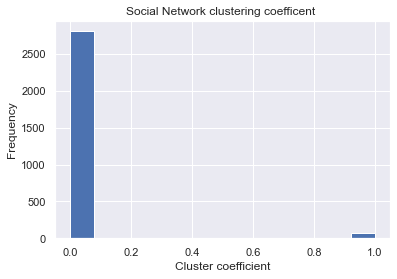

In [45]:
# Calculating the cluster coefficient
cluster_coefficient = nx.clustering(Graph)

# Plot the cluster coefficient for each node
plt.hist(list(cluster_coefficient.values()), bins = 'auto')
plt.title('Social Network clustering coefficent ')
plt.xlabel('Cluster coefficient')
plt.ylabel('Frequency')
plt.show()

The clustering coefficient measures how close the nodes are to one another. The plot shows the most of the network nodes have weak ties. However we do see high cluster coefficeint, close to 1.0, only for a few nodes. 

Node 1: 0.1860965105682874
Node 35: 0.024013902261217815
Node 69: 0.02180347729360568
Node 71: 0.008882130911919658
Node 90: 0.0033165636127187605
Node 217: 0.0033165636127187605
Node 247: 0.24124220674273653
Node 288: 0.46612992918844975
Node 1525: 0.4294450041419194
Node 603: 0.5497065448918781
Node 710: 0.12724689931998354
Node 714: 0.11276804568283787
Node 335: 0.06496251387141584
Node 716: 0.0630490806278828
Node 719: 0.0630490806278828
Node 2232: 0.06541043188081637
Node 1524: 0.13019147414713747
Node 2594: 0.039386539559729726
Node 2699: 0.13099957488596214
Node 2536: 0.03910425039624901
Node 2687: 0.09928765193746143


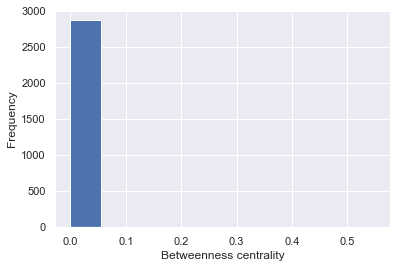

In [46]:
# Calculating the betweenness centrality of each node
bc = nx.betweenness_centrality(Graph)

# Iterate through the betweenness centrality values
for node, value in bc.items():
  # If the value is greater than zero, print it
  if value > 0:
    print(f"Node {node}: {value}")

# Plotting the betweenness centrality for each node
plt.hist(list(bc.values()))
plt.xlabel('Betweenness centrality')
plt.ylabel('Frequency')
plt.show()

Using the betweenness centrality function we can observe that only a that only a few nodes have have positive betweeness centrality values and their values are low as well.

Therefore while traversing the network, these nodes do not appear frequently on the path. However, the highest betweenness centrality number of 0.55 is for node 603 which means that this node appears most number of times when traversing on the shortest path between other nodes.

In [47]:
# Calculating the assortativity
r = nx.degree_assortativity_coefficient(Graph)
print(f'Assortativity: {r:.2f}')

Assortativity: -0.67


This assortavity coefficient of -0.67 shows that the nodes in the network tend to connect to other nodes with dissimilar characteristics. 

By doing a visual analysis of the network and assessing the statistics and plots the following conclusions are provided:
- The social network data is a single entity network had has 2888 nodes. Any node can be used to traverse to another node 
- The network has low density of 0.007 therefore there is very low relationship between all nodes.
- As we see from the network topology only a few nodes have more than one edges. Therefore see a few concentration of network clusters. The highest concentration of nodes is around node 603 which has 769 edges. This follows with node 1525 which has 710 edges.
- Since most of the nodes have only one or two edges therefore their cluster coefficient data shows high frequency for lower values.
- A negative assortivity value indicates that the network has a high degree of segregation, where nodes are divided into distinct blocks that are relatively isolated from each other. 